# **Preparação dos dados**
> Carlos Eduardo Beluzo | cbeluzo@gmail.com | Agosto/2023

- Preparação de conjunto de dados referente aos nascimento (SINASC) e óbitos infantis (SIM) ocorridos na cidade do Rio de Janeiro nos anos de 2014 a 2018.

- Os dados foram cedidos sob acordo de colaboração do projeto Link Data POP ...


Linkage SINASC com Mortalidade de menores de 5 anos.
Bases:
SINASC 87.916 mil registros (A base do Datasus tem 89991 incluindo gestacao multipla)
SIM 1.177 mil  registros (2014 a 2018, nascidos em 2014)

----


Pré-processamento Etapa 1:
> Nesta etápa de pré-processamento serão realizadas apenas correções nos campos NUMERO_DO, NUMERO_DN, DT_NASC_RN e DT_OBITO_RN, para fins de combinação dos conjuntos de dados.

## Funções auxiliares

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import numpy as np


pd.set_option('display.max_columns', None)

base_path = "/content/drive/MyDrive/datasets/Link_DataPop_Coorte_2014/01_Bases/"
output_path = "/content/drive/MyDrive/datasets/Link_DataPop_Coorte_2014/output/"

In [ ]:
def resumo(csv_file_name, df = None, sep = ';', litle=False):
  if df is None:
    df = pd.read_csv(base_path + csv_file_name +'.csv', low_memory=False, sep=sep, encoding="ISO-8859-1")

  column_mapping = {col: col.upper() for col in df.columns}
  df = df.rename(columns=column_mapping)

  print("------------------------------------------")
  print("Informações de resumo de conjunto de dados")
  print("------------------------------------------")
  print("Tabela: [%s] \n" % csv_file_name)
  print("- Total de instâncias (linhas): " , df.shape[0])
  print("- Total de variáveis (colunas): " , df.shape[1])

  print("\nNome das variáveis")
  print("-------------------")
  print(list(df.columns))

  resumo2(df)

  #print("\nTipos de dados")
  #print("----------------")
  #for column, dtype in df.dtypes.items():
  #  print(f"{column}: {dtype}")

  #print("\n% de valores nulos por coluna")
  #print("--------------------------------")
  #total_rows = len(df)
  #for column_name in df.columns:
  #  null_count = df[column_name].isnull().sum()
  #  null_percentage = (null_count / total_rows) * 100
  #  print(f"{column_name}: {null_count} ({null_percentage:.2f}%)")

  if litle:
    return df;

  print("\nDomínio de dados por coluna")
  print("--------------------------------")
  # Iterate through each column in the DataFrame
  for column_name in df.columns:
      unique_values = df[column_name].unique()
      print(f"{column_name}:")

      #print(unique_values)

      try:
        if len(unique_values) > 20:
          print(sorted(unique_values)[:10] , ' . . . ' , sorted(unique_values)[-10:])
        else:
          print(sorted(unique_values))
      except:
        print(unique_values)

      print()  # Print an empty line for separation

  return df

def resumo2(df):
  print("\nTipos de dados e (%) de valores nulos por coluna")
  print("--------------------------------------------------")

  total_rows = len(df)

  for column_name in df.columns:
      dtype = df[column_name].dtype
      null_count = df[column_name].isnull().sum()
      null_percentage = (null_count / total_rows) * 100


      print(f"{column_name}: {dtype} | Nulls: {null_count} ({null_percentage:.2f}%) ")
      #print(create_progress_bar(null_percentage/100))

def create_progress_bar(progress):
    bar_length = 50
    num_bars = int(progress * bar_length)
    num_spaces = bar_length - num_bars
    progress_bar = "|" * num_bars + " " + str(progress * 100) + "%" + " " * num_spaces + ']'

    return progress_bar


# 1) Dataset: Link_DataPop_Maes_2014

Conjunto de variáveis adicionais referentes ao histórico de gestações da mãe. Os eventos anteriores estão representados em quantidade.

In [ ]:
maes = resumo('Link_DataPop_Maes_2014')

------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [Link_DataPop_Maes_2014] 

- Total de instâncias (linhas):  88979
- Total de variáveis (colunas):  6

Nome das variáveis
-------------------
['DN_NUMERODN', 'LINKAGE_QTDFILVIVOANT', 'LINKAGE_QTDFILMORTANT', 'LINKAGE_PREMATANT', 'LINKAGE_BAIXOPESOANT', 'LINKAGE_DIAS']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
DN_NUMERODN: int64 | Nulls: 0 (0.00%) 
LINKAGE_QTDFILVIVOANT: float64 | Nulls: 65679 (73.81%) 
LINKAGE_QTDFILMORTANT: float64 | Nulls: 88979 (100.00%) 
LINKAGE_PREMATANT: float64 | Nulls: 86370 (97.07%) 
LINKAGE_BAIXOPESOANT: float64 | Nulls: 86215 (96.89%) 
LINKAGE_DIAS: float64 | Nulls: 65679 (73.81%) 

Domínio de dados por coluna
--------------------------------
DN_NUMERODN:
[55008080, 55718148, 57087519, 57350401, 57379805, 57379806, 57443483, 57443490, 57443493, 57443502]  . . .  [662

In [ ]:
maes.fillna(0,inplace=True)
maes.rename(columns={"DN_NUMERODN": "NUMERO_DN"}, inplace=True)

for col in maes.columns:
  if maes[col].dtype == 'float64':
    maes[col] = maes[col].astype(int)

resumo('Link_DataPop_Maes_2014',maes, litle=True)

------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [Link_DataPop_Maes_2014] 

- Total de instâncias (linhas):  88979
- Total de variáveis (colunas):  6

Nome das variáveis
-------------------
['NUMERO_DN', 'LINKAGE_QTDFILVIVOANT', 'LINKAGE_QTDFILMORTANT', 'LINKAGE_PREMATANT', 'LINKAGE_BAIXOPESOANT', 'LINKAGE_DIAS']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
NUMERO_DN: int64 | Nulls: 0 (0.00%) 
LINKAGE_QTDFILVIVOANT: int64 | Nulls: 0 (0.00%) 
LINKAGE_QTDFILMORTANT: int64 | Nulls: 0 (0.00%) 
LINKAGE_PREMATANT: int64 | Nulls: 0 (0.00%) 
LINKAGE_BAIXOPESOANT: int64 | Nulls: 0 (0.00%) 
LINKAGE_DIAS: int64 | Nulls: 0 (0.00%) 


,NUMERO_DN,LINKAGE_QTDFILVIVOANT,LINKAGE_QTDFILMORTANT,LINKAGE_PREMATANT,LINKAGE_BAIXOPESOANT,LINKAGE_DIAS
0,62185146,1,0,0,0,1164
1,62332161,1,0,0,0,2242
2,62343666,1,0,0,0,4398
3,65694410,1,0,0,0,1971
4,65696147,3,0,0,0,886
...,...,...,...,...,...,...
88974,62997008,0,0,0,0,0
88975,66441824,0,0,0,0,0
88976,62982858,0,0,0,0,0
88977,62982623,0,0,0,0,0


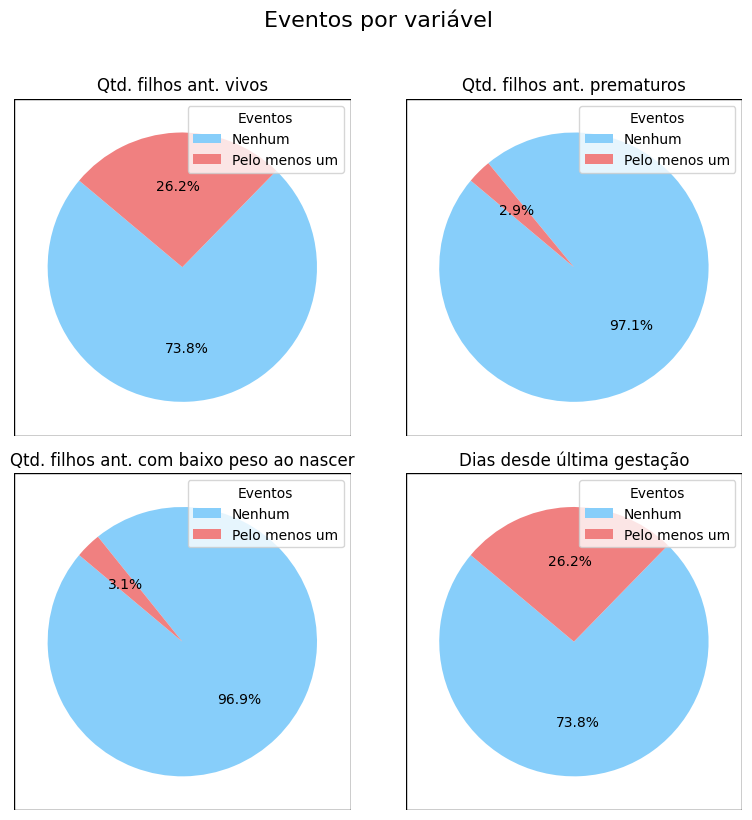

In [ ]:
# Dictionary with variable descriptions and percentages
dict_aux = {
    'LINKAGE_QTDFILVIVOANT': {'description': 'Qtd. filhos ant. vivos', 'percentage': 73.81},
    'LINKAGE_PREMATANT': {'description': 'Qtd. filhos ant. prematuros', 'percentage': 97.07},
    'LINKAGE_BAIXOPESOANT': {'description': 'Qtd. filhos ant. com baixo peso ao nascer', 'percentage': 96.89},
    'LINKAGE_DIAS': {'description': 'Dias desde última gestação', 'percentage': 73.81}
}

# Create a 2x2 grid of subplots for pie charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for idx, (colname, info) in enumerate(dict_aux.items()):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    sizes = [info['percentage'], 100 - info['percentage']]
    labels = [f"{info['percentage']:.2f}%", f"{100 - info['percentage']:.2f}%"]
    colors = ['lightskyblue', 'lightcoral']

    wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{info["description"]}')

    # Add a border around each subplot
    rect = plt.Rectangle((0, 0), 1, 1, transform=ax.transAxes, color='black', lw=1, fill=False)
    ax.add_artist(rect)

    # Add legend with custom labels
    legend_labels = ['Nenhum', 'Pelo menos um']
    ax.legend(wedges, legend_labels, loc='upper right', title='Eventos')

# Add the overall title
plt.suptitle('Eventos por variável', fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Pré-processamento: Link_DataPop_Maes_2014

In [ ]:
df = maes
df.rename(columns={"DN_NUMERODN": "NUMERO_DN"}, inplace=True)
df.fillna(0, inplace=True)

maes_dict = {
  'LINKAGE_QTDFILVIVOANT': 'Qtd. de filhos anteriores vivos',
  'LINKAGE_QTDFILMORTANT': 'Qtd. de filhos anteriores falecidos',
  'LINKAGE_PREMATANT': 'Qtd. de filhos anteriores prematuros',
  'LINKAGE_BAIXOPESOANT': 'Quantidade de filhos anteriores com baixo peso ao nascer',
  'LINKAGE_DIAS': 'Dias desde última gestação'#,
 # 'ANOS_GESTACAO_ANTERIOR': 'Anos desde a última gestação',
 # 'MESES_GESTACAO_ANTERIOR': 'Meses desde a última gestação',
 # 'SEMANAS_GESTACAO_ANTERIOR': 'Semanas desde a última gestação'
}

# Criação de Variáveis adicionais
#df['ANOS_GESTACAO_ANTERIOR'] = df['LINKAGE_DIAS'] / 365
#df['MESES_GESTACAO_ANTERIOR'] = df['LINKAGE_DIAS'] / 12
#df['SEMANAS_GESTACAO_ANTERIOR'] = df['LINKAGE_DIAS'] / 7

for col in ['LINKAGE_QTDFILVIVOANT', 'LINKAGE_QTDFILMORTANT', 'LINKAGE_PREMATANT', 'LINKAGE_BAIXOPESOANT', 'LINKAGE_DIAS',
            #'ANOS_GESTACAO_ANTERIOR','MESES_GESTACAO_ANTERIOR', 'SEMANAS_GESTACAO_ANTERIOR'
            ]:
  df[col] = df[col].astype(int)

maes = resumo('maes', df)


------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [maes] 

- Total de instâncias (linhas):  88979
- Total de variáveis (colunas):  6

Nome das variáveis
-------------------
['NUMERO_DN', 'LINKAGE_QTDFILVIVOANT', 'LINKAGE_QTDFILMORTANT', 'LINKAGE_PREMATANT', 'LINKAGE_BAIXOPESOANT', 'LINKAGE_DIAS']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
NUMERO_DN: int64 | Nulls: 0 (0.00%) 
LINKAGE_QTDFILVIVOANT: int64 | Nulls: 0 (0.00%) 
LINKAGE_QTDFILMORTANT: int64 | Nulls: 0 (0.00%) 
LINKAGE_PREMATANT: int64 | Nulls: 0 (0.00%) 
LINKAGE_BAIXOPESOANT: int64 | Nulls: 0 (0.00%) 
LINKAGE_DIAS: int64 | Nulls: 0 (0.00%) 

Domínio de dados por coluna
--------------------------------
NUMERO_DN:
[55008080, 55718148, 57087519, 57350401, 57379805, 57379806, 57443483, 57443490, 57443493, 57443502]  . . .  [66289074, 66289261, 66289297, 66313472, 66426336, 66441824, 665

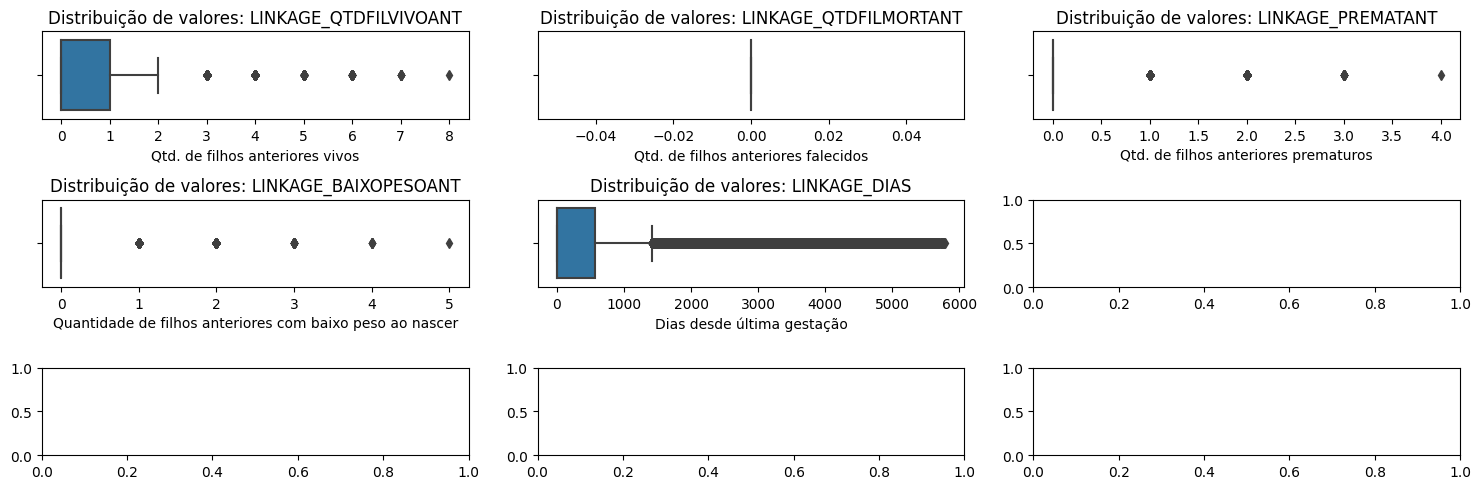

In [ ]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 5))

# Iterate through the maes_dict and create box plots
for idx, (colname, description) in enumerate(maes_dict.items()):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    sns.boxplot(x=df[colname], ax=ax)
    ax.set_xlabel(description)
    ax.set_ylabel('')
    ax.set_title(f'Distribuição de valores: {colname}')

plt.tight_layout()
plt.show()

# 2) Link_DataPop_MRJ_Obitos_Nao_Pares_2014_2015

- Tem 25 registros sem numero_dn


In [ ]:
obitos_nao_pares = resumo('Link_DataPop_MRJ_Obitos_Nao_Pares_2014_2015')

------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [Link_DataPop_MRJ_Obitos_Nao_Pares_2014_2015] 

- Total de instâncias (linhas):  124
- Total de variáveis (colunas):  4

Nome das variáveis
-------------------
['DO_DTNASCRN', 'DO_DTOBITO', 'DO_NUMERODO', 'DO_NUMERODN']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
DO_DTNASCRN: int64 | Nulls: 0 (0.00%) 
DO_DTOBITO: int64 | Nulls: 0 (0.00%) 
DO_NUMERODO: int64 | Nulls: 0 (0.00%) 
DO_NUMERODN: float64 | Nulls: 25 (20.16%) 

Domínio de dados por coluna
--------------------------------
DO_DTNASCRN:
[20140102, 20140109, 20140110, 20140126, 20140129, 20140205, 20140209, 20140213, 20140215, 20140218]  . . .  [20141215, 20141216, 20141217, 20141218, 20141221, 20141223, 20141227, 20141228, 20141229, 20141231]

DO_DTOBITO:
[20140109, 20140123, 20140127, 20140217, 20140218, 20140226, 20140227, 20140301, 2014

In [ ]:
# Pré-processamento
df = obitos_nao_pares

df.rename(columns={"DO_NUMERODN": "NUMERO_DN"}, inplace=True)
df.rename(columns={"DO_NUMERODO": "NUMERO_DO"}, inplace=True)
df.rename(columns={"DO_DTNASCRN": "DT_NASC"}, inplace=True)
df.rename(columns={"DO_DTOBITO": "DT_OBITO"}, inplace=True)

df['OBITO_PAR'] = 0
#df['NUMERO_DN'] = df['NUMERO_DN'].astype(int)

for col in ['DT_OBITO', 'DT_NASC']:
  df[col] = pd.to_datetime(df[col], format='%Y%m%d', errors='coerce')
  df[col] = df[col].dt.strftime('%d/%m/%Y')

df['DIAS_DE_VIDA'] = df['DT_OBITO'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y')) - df['DT_NASC'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
df['DIAS_DE_VIDA'] = df['DIAS_DE_VIDA'].dt.days

obitos_nao_pares = resumo('Link_DataPop_MRJ_Obitos_Nao_Pares_2014_2015', df)


------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [Link_DataPop_MRJ_Obitos_Nao_Pares_2014_2015] 

- Total de instâncias (linhas):  124
- Total de variáveis (colunas):  6

Nome das variáveis
-------------------
['DT_NASC', 'DT_OBITO', 'NUMERO_DO', 'NUMERO_DN', 'OBITO_PAR', 'DIAS_DE_VIDA']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
DT_NASC: object | Nulls: 0 (0.00%) 
DT_OBITO: object | Nulls: 0 (0.00%) 
NUMERO_DO: int64 | Nulls: 0 (0.00%) 
NUMERO_DN: float64 | Nulls: 25 (20.16%) 
OBITO_PAR: int64 | Nulls: 0 (0.00%) 
DIAS_DE_VIDA: int64 | Nulls: 0 (0.00%) 

Domínio de dados por coluna
--------------------------------
DT_NASC:
['01/03/2014', '01/09/2014', '02/01/2014', '02/03/2014', '02/07/2014', '02/10/2014', '03/03/2014', '03/07/2014', '04/04/2014', '04/05/2014']  . . .  ['29/03/2014', '29/04/2014', '29/06/2014', '29/07/2014', '29/10/2014', '29/

# 3) Link_DataPop_MRJ_Obitos_Pares_2014_2015

In [ ]:
obitos_pares = resumo('Link_DataPop_MRJ_Obitos_Pares_2014_2015')

------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [Link_DataPop_MRJ_Obitos_Pares_2014_2015] 

- Total de instâncias (linhas):  875
- Total de variáveis (colunas):  6

Nome das variáveis
-------------------
['SCORE', 'DN_DTNASCRN', 'DN_NUMERODN', 'DO_DTOBITO', 'DO_NUMERODO', 'DO_NUMERODN']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
SCORE: object | Nulls: 0 (0.00%) 
DN_DTNASCRN: int64 | Nulls: 0 (0.00%) 
DN_NUMERODN: int64 | Nulls: 0 (0.00%) 
DO_DTOBITO: int64 | Nulls: 0 (0.00%) 
DO_NUMERODO: int64 | Nulls: 0 (0.00%) 
DO_NUMERODN: float64 | Nulls: 53 (6.06%) 

Domínio de dados por coluna
--------------------------------
SCORE:
['  8,47702031275', '  8,52967261282', '  8,57869371979', '  8,59429134474', '  8,70737412559', '  8,75713054917', '  8,84558641330', '  8,92184146859', '  8,95615624347', '  9,00354331354']  . . .  ['  9,65859987040', '  

In [ ]:
# Pré-processamento
df = obitos_pares

df.rename(columns={"DN_NUMERODN": "NUMERO_DN"}, inplace=True)
df.rename(columns={"DO_NUMERODO": "NUMERO_DO"}, inplace=True)
df.rename(columns={"DN_DTNASCRN": "DT_NASC"}, inplace=True)
df.rename(columns={"DO_DTOBITO": "DT_OBITO"}, inplace=True)

df['OBITO_PAR'] = 1
#df.fillna(0, inplace=True)
df.drop('SCORE', axis=1, inplace=True)
#df['NUMERO_DN'] = df['NUMERO_DN'].astype(int)

for col in ['DT_OBITO', 'DT_NASC']:
  df[col] = pd.to_datetime(df[col], format='%Y%m%d', errors='coerce')
  df[col] = df[col].dt.strftime('%d/%m/%Y')

df['DIAS_DE_VIDA'] = df['DT_OBITO'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y')) - df['DT_NASC'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
df['DIAS_DE_VIDA'] = df['DIAS_DE_VIDA'].dt.days

obitos_pares = resumo('Link_DataPop_MRJ_Obitos_Pares_2014_2015', df)


------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [Link_DataPop_MRJ_Obitos_Pares_2014_2015] 

- Total de instâncias (linhas):  875
- Total de variáveis (colunas):  7

Nome das variáveis
-------------------
['DT_NASC', 'NUMERO_DN', 'DT_OBITO', 'NUMERO_DO', 'DO_NUMERODN', 'OBITO_PAR', 'DIAS_DE_VIDA']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
DT_NASC: object | Nulls: 0 (0.00%) 
NUMERO_DN: int64 | Nulls: 0 (0.00%) 
DT_OBITO: object | Nulls: 0 (0.00%) 
NUMERO_DO: int64 | Nulls: 0 (0.00%) 
DO_NUMERODN: float64 | Nulls: 53 (6.06%) 
OBITO_PAR: int64 | Nulls: 0 (0.00%) 
DIAS_DE_VIDA: int64 | Nulls: 0 (0.00%) 

Domínio de dados por coluna
--------------------------------
DT_NASC:
['01/01/2014', '01/02/2014', '01/03/2014', '01/04/2014', '01/05/2014', '01/06/2014', '01/07/2014', '01/08/2014', '01/09/2014', '01/10/2014']  . . .  ['30/08/2014', '30/10/2014

In [ ]:
# tem 1 registro inconsistente
filtered_df = df[df['DIAS_DE_VIDA'] < 0]
filtered_df

,DT_NASC,NUMERO_DN,DT_OBITO,NUMERO_DO,DO_NUMERODN,OBITO_PAR,DIAS_DE_VIDA
185,10/12/2014,65726191,25/04/2014,19503498,65726191.0,1,-229


# 4) SIM_UF_RJ_2014

- Foram encontrados problemas no campo data de nascimento, como a qualidade deste campo é ruim, tratamento de dados serão realizados posteriormente, após seleção qualitativa de campos.

- Remoção de colunas com altas % de nulos será realizada após merge.

- NUMERODN,128773 (98.27%)


In [ ]:
sim_uf_rj = resumo('SIM_UF_RJ_2014', sep=',')

------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [SIM_UF_RJ_2014] 

- Total de instâncias (linhas):  131044
- Total de variáveis (colunas):  92

Nome das variáveis
-------------------
['NUMERODO', 'CODINST', 'NUMERODV', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NUMSUS', 'NATURAL', 'CODMUNNATU', 'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'ESTABDESCR', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'NUMERODN', 'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE', 'CRM', 'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'NUMEROLOTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADAS

In [ ]:
# Pré-processamento
df = sim_uf_rj[['NUMERODO','DTOBITO','CAUSABAS_O','NUMERODN']].copy()

df.rename(columns={"DTOBITO": "DT_OBITO"}, inplace=True)
df.rename(columns={"NUMERODO": "NUMERO_DO"}, inplace=True)
df.rename(columns={"CAUSABAS_O": "CAUSABAS"}, inplace=True)
df.rename(columns={"NUMERODN": "NUMERO_DN"}, inplace=True)

df['NUMERO_DO'] = df['NUMERO_DO'].astype(int)
df['DT_OBITO'] = df['DT_OBITO'].astype(str)

for col in ['DT_OBITO']:
  for index, value in df.iterrows():
    if len(value[col]) == 7:
      df.at[index, col] = '0' + value[col]

for col in ['DT_OBITO']:
  try:
    df[col] = df[col].apply(lambda x: pd.to_datetime(x, format='%d%m%Y'))
    df[col] = df[col].dt.strftime('%d/%m/%Y')
  except:
    print(df[col])
    print('ERRO!!!!!!!!!!!')
    break

sim_uf_rj = resumo('SIM_UF_RJ_2014', df, litle=False)

------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [SIM_UF_RJ_2014] 

- Total de instâncias (linhas):  131044
- Total de variáveis (colunas):  4

Nome das variáveis
-------------------
['NUMERO_DO', 'DT_OBITO', 'CAUSABAS', 'NUMERO_DN']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
NUMERO_DO: int64 | Nulls: 0 (0.00%) 
DT_OBITO: object | Nulls: 0 (0.00%) 
CAUSABAS: object | Nulls: 0 (0.00%) 
NUMERO_DN: float64 | Nulls: 128773 (98.27%) 

Domínio de dados por coluna
--------------------------------
NUMERO_DO:
[241065, 242106, 794051, 998152, 1389873, 1828577, 2282705, 2283589, 2290878, 2303252]  . . .  [22571437, 22594109, 22818404, 22818405, 22818406, 22818414, 22818415, 22818416, 22818417, 22832601]

DT_OBITO:
['01/01/2014', '01/02/2014', '01/03/2014', '01/04/2014', '01/05/2014', '01/06/2014', '01/07/2014', '01/08/2014', '01/09/2014', '01/10/2014'] 

In [ ]:
for index, row in sim_uf_rj.iterrows():
    if pd.isnull(row['NUMERO_DN']):
        numero_do = row['NUMERO_DO']

        # Procurar em obitos_nao_pares
        obitos_nao_pares_match = obitos_nao_pares.loc[obitos_nao_pares['NUMERO_DO'] == numero_do, 'NUMERO_DN']

        # Se não encontrar em obitos_nao_pares, procurar em obitos_pares
        if obitos_nao_pares_match.empty:
            obitos_pares_match = obitos_pares.loc[obitos_pares['NUMERO_DO'] == numero_do, 'NUMERO_DN']

            # Preencher NUMERO_DN em sim_uf_rj com o valor encontrado em obitos_pares, se existir
            if not obitos_pares_match.empty:
                sim_uf_rj.at[index, 'NUMERO_DN'] = obitos_pares_match.iloc[0]
        else:
            # Preencher NUMERO_DN em sim_uf_rj com o valor encontrado em obitos_nao_pares
            sim_uf_rj.at[index, 'NUMERO_DN'] = obitos_nao_pares_match.iloc[0]

sim_uf_rj = resumo('SIM_UF_RJ_2014', sim_uf_rj, litle=True)

------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [SIM_UF_RJ_2014] 

- Total de instâncias (linhas):  131044
- Total de variáveis (colunas):  4

Nome das variáveis
-------------------
['NUMERO_DO', 'DT_OBITO', 'CAUSABAS', 'NUMERO_DN']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
NUMERO_DO: int64 | Nulls: 0 (0.00%) 
DT_OBITO: object | Nulls: 0 (0.00%) 
CAUSABAS: object | Nulls: 0 (0.00%) 
NUMERO_DN: float64 | Nulls: 128764 (98.26%) 


In [ ]:
#Buscar maes DN_NUMERODN
# nas tabelas obitos tem DN e DO
# pegar DN da tabela mae, e buscar DO na tabela obito
# com o do encontrado, procuro este do no SIM, verifico se é nulo e preencho com DN da tabela mae


maes

,NUMERO_DN,LINKAGE_QTDFILVIVOANT,LINKAGE_QTDFILMORTANT,LINKAGE_PREMATANT,LINKAGE_BAIXOPESOANT,LINKAGE_DIAS
0,62185146,1,0,0,0,1164
1,62332161,1,0,0,0,2242
2,62343666,1,0,0,0,4398
3,65694410,1,0,0,0,1971
4,65696147,3,0,0,0,886
...,...,...,...,...,...,...
88974,62997008,0,0,0,0,0
88975,66441824,0,0,0,0,0
88976,62982858,0,0,0,0,0
88977,62982623,0,0,0,0,0


In [ ]:
sim_uf_rj = resumo('SIM_UF_RJ_2014', sim_uf_rj, litle=True)

------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [SIM_UF_RJ_2014] 

- Total de instâncias (linhas):  131044
- Total de variáveis (colunas):  4

Nome das variáveis
-------------------
['NUMERO_DO', 'DT_OBITO', 'CAUSABAS', 'NUMERO_DN']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
NUMERO_DO: int64 | Nulls: 0 (0.00%) 
DT_OBITO: object | Nulls: 0 (0.00%) 
CAUSABAS: object | Nulls: 0 (0.00%) 
NUMERO_DN: float64 | Nulls: 128764 (98.26%) 


### Validação de Sanidade

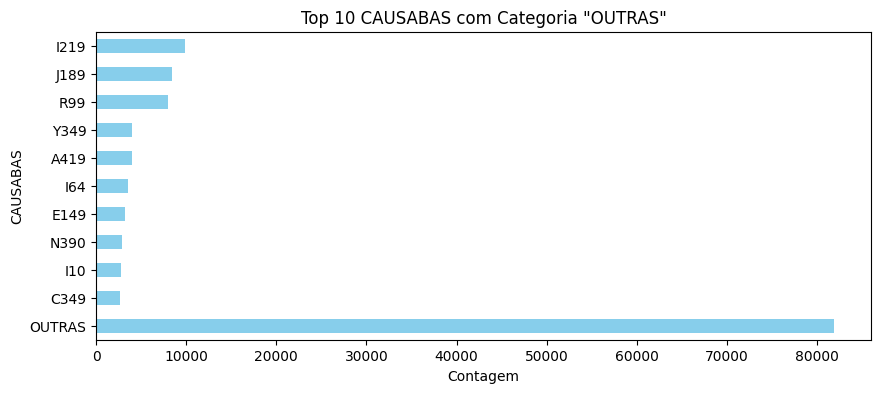

In [ ]:
df = sim_uf_rj
# Primeiro, conte a frequência de cada valor em 'CAUSABAS'
causabas_counts = df['CAUSABAS'].value_counts()

# Selecione os top 10 valores mais frequentes e calcule a soma das contagens dos restantes
top_10_causabas = causabas_counts.head(10)
other_causabas_count = causabas_counts.iloc[10:].sum()

# Crie um novo DataFrame com os top 10 valores e a categoria "OUTRAS"
top_causabas_df = pd.concat([top_10_causabas, pd.Series({'OUTRAS': other_causabas_count})])

# Plote o gráfico de barras horizontais
plt.figure(figsize=(10, 4))
top_causabas_df.plot(kind='barh', color='skyblue')
plt.xlabel('Contagem')
plt.ylabel('CAUSABAS')
plt.title('Top 10 CAUSABAS com Categoria "OUTRAS"')
plt.gca().invert_yaxis()  # Inverte o eixo y para exibir os valores mais frequentes no topo
plt.show()


# 5) SINASC_MRJ_2014

In [ ]:
sinasc_mrj_2014 = resumo('SINASC_MRJ_2014')

------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [SINASC_MRJ_2014] 

- Total de instâncias (linhas):  89991
- Total de variáveis (colunas):  64

Nome das variáveis
-------------------
['NUMERODN', 'CODINST', 'ORIGEM', 'NUMERODV', 'PREFIXODN', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO', 'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMA

In [ ]:
# Pré-processamento
columns_selection = [
  'NUMERODN',
  #'CODINST', 'ORIGEM', 'NUMERODV', 'PREFIXODN', 'CODESTAB', 'CODMUNNASC',
  'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', #'ESCMAE',
  'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT',
  #'CODMUNRES',
  'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC',
  #'HORANASC',
  'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL',
  #'DTCADASTRO',
  #'CODANOMAL',
  #'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU',
  'ESCMAE2010',
  #'SERIESCMAE', 'DTNASCMAE',
  'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES',
  #'IDADEPAI', 'DTULTMENST',
  'SEMAGESTAC',
  #'TPMETESTIM',
  'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI',
  #'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES',
  'TPROBSON', 'PARIDADE', 'KOTELCHUCK'
  ]

df = sinasc_mrj_2014[columns_selection].copy()

df.rename(columns={"NUMERODN": "NUMERO_DN"}, inplace=True)
df.rename(columns={"DTNASC": "DT_NASC"}, inplace=True)
df['DT_NASC'] = df['DT_NASC'].astype(str)

for col in ['DT_NASC']:
  for index, value in df.iterrows():
    if len(value[col]) == 7:
      df.at[index, col] = '0' + value[col]

for col in ['DT_NASC']:
  try:
    df[col] = df[col].apply(lambda x: pd.to_datetime(x, format='%d%m%Y'))
    df[col] = df[col].dt.strftime('%d/%m/%Y')
  except:
    print(df[col])
    print('ERRO!!!!!!!!!!!')
    break

sinasc_mrj_2014 = resumo('SINASC_MRJ_2014', df, litle=True)

------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [SINASC_MRJ_2014] 

- Total de instâncias (linhas):  89991
- Total de variáveis (colunas):  33

Nome das variáveis
-------------------
['NUMERO_DN', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DT_NASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'ESCMAE2010', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'SEMAGESTAC', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI', 'TPROBSON', 'PARIDADE', 'KOTELCHUCK']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
NUMERO_DN: int64 | Nulls: 0 (0.00%) 
LOCNASC: int64 | Nulls: 0 (0.00%) 
IDADEMAE: int64 | Nulls: 0 (0.00%) 
ESTCIVMAE: float64 | Nulls: 362 (0.40%) 
CODOCUPMAE: float64 | Nulls: 9039 (10.04%) 
QTDFILVIVO: float64 |

### Validação de sanidade

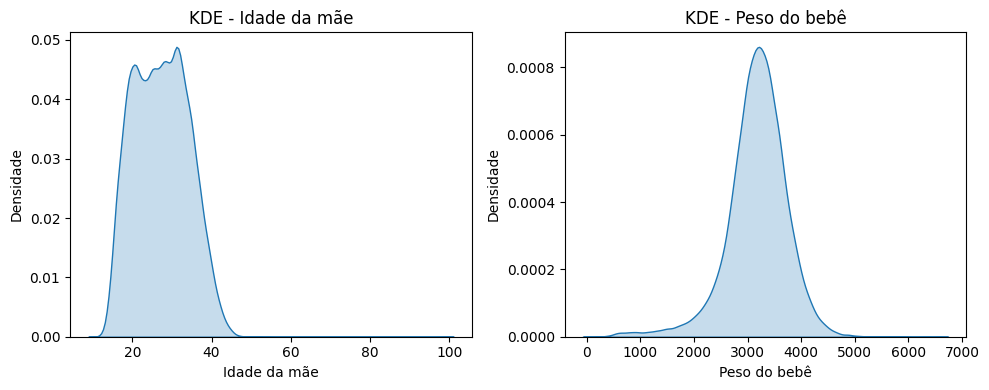

In [ ]:
df = sinasc_mrj_2014
plt.figure(figsize=(10,4))

# Gráfico KDE para 'IDADEMAE'
plt.subplot(1, 2, 1)  # Configura o subplot superior
sns.kdeplot(data=df, x='IDADEMAE', fill=True)
plt.xlabel('Idade da mãe')
plt.ylabel('Densidade')
plt.title('KDE - Idade da mãe')

# Gráfico KDE para 'PESO'
plt.subplot(1, 2, 2)  # Configura o subplot inferior
sns.kdeplot(data=df, x='PESO', fill=True)
plt.xlabel('Peso do bebê')
plt.ylabel('Densidade')
plt.title('KDE - Peso do bebê')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


# 6) Junção de tabelas

### 6.1) Junção dos conjuntos de dados: SINASC_MRJ_2014 e MAES

In [ ]:
print('Dimensões da tabela original MAES:', maes.shape)
print('Dimensões da tabela original SINASC_MRJ_2014:', sinasc_mrj_2014.shape)
print('Diferença de registros (maes - sinasc_mrj_2014) : ', maes.shape[0] - sinasc_mrj_2014.shape[0])

merge_sinasc_maes = pd.merge(left=maes, right=sinasc_mrj_2014, how='inner')
print('Dimensões da tabela resuntante da junção (maes INNER JOIN sinasc_mrj_2014):', merge_sinasc_maes.shape)

print('NUMERO_DN do conjunto maes não encontrados no conuunto sinasc_mrj_2014): ', merge_sinasc_maes.shape[0] - maes.shape[0])

resumo('Merge entre dataframes sinasc_mrj_2014 e maes',merge_sinasc_maes, litle=True)


Dimensões da tabela original MAES: (88979, 6)
Dimensões da tabela original SINASC_MRJ_2014: (89991, 33)
Diferença de registros (maes - sinasc_mrj_2014) :  -1012
Dimensões da tabela resuntante da junção (maes INNER JOIN sinasc_mrj_2014): (88932, 38)
NUMERO_DN do conjunto maes não encontrados no conuunto sinasc_mrj_2014):  -47
------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [Merge entre dataframes sinasc_mrj_2014 e maes] 

- Total de instâncias (linhas):  88932
- Total de variáveis (colunas):  38

Nome das variáveis
-------------------
['NUMERO_DN', 'LINKAGE_QTDFILVIVOANT', 'LINKAGE_QTDFILMORTANT', 'LINKAGE_PREMATANT', 'LINKAGE_BAIXOPESOANT', 'LINKAGE_DIAS', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DT_NASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'ESCMAE2010', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNO

,NUMERO_DN,LINKAGE_QTDFILVIVOANT,LINKAGE_QTDFILMORTANT,LINKAGE_PREMATANT,LINKAGE_BAIXOPESOANT,LINKAGE_DIAS,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DT_NASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,ESCMAE2010,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,SEMAGESTAC,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPROBSON,PARIDADE,KOTELCHUCK
0,62185146,1,0,0,0,1164,1,24,1.0,999992.0,2.0,0.0,5.0,1.0,2.0,4,12/01/2014,F,8.0,9.0,4.0,2875,2.0,3.0,4.0,2.0,0.0,2.0,37.0,7.0,7.0,1.0,2.0,3.0,1.0,5,1,2
1,62332161,1,0,0,0,2242,1,41,1.0,NaN,3.0,0.0,6.0,1.0,2.0,3,28/03/2014,F,9.0,10.0,2.0,3000,2.0,2.0,2.0,3.0,3.0,0.0,42.0,5.0,3.0,1.0,2.0,2.0,1.0,3,1,3
2,62343666,1,0,0,0,4398,1,37,1.0,NaN,1.0,2.0,5.0,1.0,2.0,4,05/03/2014,F,9.0,9.0,2.0,2940,2.0,2.0,2.0,3.0,1.0,0.0,38.0,8.0,2.0,1.0,2.0,1.0,1.0,4,1,5
3,65694410,1,0,0,0,1971,1,40,2.0,241005.0,1.0,0.0,5.0,1.0,2.0,4,31/10/2014,F,7.0,8.0,4.0,3230,9.0,5.0,4.0,1.0,0.0,1.0,38.0,9.0,2.0,1.0,2.0,1.0,1.0,5,1,5
4,65696147,3,0,0,0,886,1,22,1.0,999992.0,4.0,1.0,5.0,1.0,1.0,4,21/11/2014,F,9.0,10.0,4.0,3485,2.0,2.0,4.0,5.0,4.0,0.0,40.0,7.0,4.0,1.0,2.0,NaN,2.0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88927,62997008,0,0,0,0,0,1,36,2.0,142105.0,0.0,1.0,5.0,1.0,2.0,4,01/12/2014,M,9.0,10.0,1.0,3275,2.0,5.0,1.0,1.0,0.0,0.0,40.0,15.0,1.0,1.0,1.0,2.0,1.0,4,1,5
88928,66441824,0,0,0,0,0,1,28,2.0,262105.0,1.0,0.0,5.0,1.0,2.0,4,16/12/2014,F,9.0,9.0,1.0,3685,2.0,5.0,1.0,1.0,1.0,0.0,38.0,10.0,1.0,1.0,2.0,1.0,1.0,4,1,5
88929,62982858,0,0,0,0,0,1,26,2.0,524305.0,0.0,0.0,4.0,1.0,2.0,4,05/11/2014,M,8.0,9.0,1.0,1980,1.0,3.0,1.0,0.0,0.0,0.0,33.0,11.0,2.0,1.0,2.0,1.0,1.0,10,0,5
88930,62982623,0,0,0,0,0,1,41,2.0,231205.0,2.0,0.0,4.0,1.0,2.0,4,31/10/2014,F,9.0,10.0,4.0,2150,1.0,3.0,4.0,2.0,2.0,0.0,36.0,8.0,2.0,1.0,2.0,2.0,1.0,10,1,5


### 6.2) [REMOVER] União dos conjuntos de dados de óbitos: PARES e NÃO-PARES

In [ ]:
''''
print('Dimensões da tabela original Obitos_Pares:', obitos_pares.shape)
print('Dimensões da tabela original Obitos_Nao_Pares:', obitos_nao_pares.shape)

obitos = pd.concat([obitos_pares, obitos_nao_pares], ignore_index=True)

print('Dimensões da tabela resuntante do merge:', obitos.shape)

resumo('Óbitos na cidade do Rio de Janeiro em 2014',obitos)
'''

"'\nprint('Dimensões da tabela original Obitos_Pares:', obitos_pares.shape)\nprint('Dimensões da tabela original Obitos_Nao_Pares:', obitos_nao_pares.shape)\n\nobitos = pd.concat([obitos_pares, obitos_nao_pares], ignore_index=True)\n\nprint('Dimensões da tabela resuntante do merge:', obitos.shape)\n\nresumo('Óbitos na cidade do Rio de Janeiro em 2014',obitos)\n"

In [ ]:
''''
df = obitos.copy()

plt.figure(figsize=(6, 3))
sns.kdeplot(df['DIAS_DE_VIDA'], shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) Plot')
plt.show()
'''

"'\ndf = obitos.copy()\n\nplt.figure(figsize=(6, 3))\nsns.kdeplot(df['DIAS_DE_VIDA'], shade=True)\nplt.xlabel('Values')\nplt.ylabel('Density')\nplt.title('Kernel Density Estimate (KDE) Plot')\nplt.show()\n"

### 6.3) [REMOVER] Uniao dos conjuntos de dados de óbito

Dos 999 registros de óbitos, foi possível combinar 847 na tabela de dados SIM utilizando o campo numero_do.

- Nesto ponto a informação de CAUSA BÁSICA do SIM é incluída. Demais variáveis do SIM foram descartadas.

In [ ]:
''''
print('Dimensões da tabela de dados [obitos]:', obitos.shape)
print('Dimensões da tabela de dados [sim_uf_rj]:', sim_uf_rj.shape)

sim_uf_rj = sim_uf_rj[['NUMERO_DO','NUMERODN','CAUSABAS']]

print('\nAnálise de junção por NUMERO_DN...')
obitos_final = pd.merge(left = obitos, right = sim_uf_rj, how = 'inner', left_on='NUMERO_DN', right_on='NUMERODN')
print('- Dimensões da tabela de dados [obitos] INNER JOIN [sim_uf_rj] ON NUMERO_DN:', obitos_final.shape)

print('\nAnálise de junção por NUMERO_DO...')
obitos_final = pd.merge(left = obitos, right = sim_uf_rj, how = 'inner', left_on='NUMERO_DO', right_on='NUMERO_DO')
print('- Dimensões da tabela de dados [obitos] INNER JOIN [sim_uf_rj] ON NUMERO_DO:', obitos_final.shape)

obitos_final = pd.merge(left = obitos, right = sim_uf_rj, how = 'left', left_on='NUMERO_DO', right_on='NUMERO_DO')
print('\nFINAL: Dimensões da tabela de dados obitos LEFT JOIN sim_uf_rj ON NUMERO_DO:', obitos_final.shape)
print('')

resumo('Conjuto de dados final de óbitos', obitos_final, litle=False)
'''

"'\nprint('Dimensões da tabela de dados [obitos]:', obitos.shape)\nprint('Dimensões da tabela de dados [sim_uf_rj]:', sim_uf_rj.shape)\n\nsim_uf_rj = sim_uf_rj[['NUMERO_DO','NUMERODN','CAUSABAS']]\n\nprint('\nAnálise de junção por NUMERO_DN...')\nobitos_final = pd.merge(left = obitos, right = sim_uf_rj, how = 'inner', left_on='NUMERO_DN', right_on='NUMERODN')\nprint('- Dimensões da tabela de dados [obitos] INNER JOIN [sim_uf_rj] ON NUMERO_DN:', obitos_final.shape)\n\nprint('\nAnálise de junção por NUMERO_DO...')\nobitos_final = pd.merge(left = obitos, right = sim_uf_rj, how = 'inner', left_on='NUMERO_DO', right_on='NUMERO_DO')\nprint('- Dimensões da tabela de dados [obitos] INNER JOIN [sim_uf_rj] ON NUMERO_DO:', obitos_final.shape)\n\nobitos_final = pd.merge(left = obitos, right = sim_uf_rj, how = 'left', left_on='NUMERO_DO', right_on='NUMERO_DO')\nprint('\nFINAL: Dimensões da tabela de dados obitos LEFT JOIN sim_uf_rj ON NUMERO_DO:', obitos_final.shape)\nprint('')\n\nresumo('Conjuto d

### 6.4) Merge final: Nascimento e Óbitos.


- 838 registros combinados entre SINASC e SIM



In [ ]:
print('Dimensões da tabela de dados [merge_sinasc_maes]:', merge_sinasc_maes.shape)
print('Dimensões da tabela de dados [sim_uf_rj]:', sim_uf_rj.shape)

df_final = pd.merge(left = merge_sinasc_maes , right = sim_uf_rj, how = 'inner', left_on='NUMERO_DN', right_on='NUMERO_DN')
print('Dimensões da tabela de dados resultante merge_sinasc_maes INNER JOIN sim_uf_rj:', df_final.shape)

df_final = pd.merge(left = merge_sinasc_maes , right = sim_uf_rj, how = 'left', left_on='NUMERO_DN', right_on='NUMERO_DN')
print('Dimensões da tabela de dados resultante merge_sinasc_maes LEFT JOIN sim_uf_rj:', df_final.shape)

#resumo('Conjuto de dados final de óbitos', df_final, litle=True)

# Removendo registros com NUMERO_DN
df_final = df_final.drop_duplicates(subset='NUMERO_DN', keep=False) # 88932

resumo('Conjuto de dados final', df_final, litle=True)

df_copy = df_final.copy()


Dimensões da tabela de dados [merge_sinasc_maes]: (88932, 38)
Dimensões da tabela de dados [sim_uf_rj]: (131044, 4)
Dimensões da tabela de dados resultante merge_sinasc_maes INNER JOIN sim_uf_rj: (838, 41)
Dimensões da tabela de dados resultante merge_sinasc_maes LEFT JOIN sim_uf_rj: (88934, 41)
------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [Conjuto de dados final] 

- Total de instâncias (linhas):  88930
- Total de variáveis (colunas):  41

Nome das variáveis
-------------------
['NUMERO_DN', 'LINKAGE_QTDFILVIVOANT', 'LINKAGE_QTDFILMORTANT', 'LINKAGE_PREMATANT', 'LINKAGE_BAIXOPESOANT', 'LINKAGE_DIAS', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DT_NASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'ESCMAE2010', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'SEMAGESTAC', 'CONSPRENAT', 'MESPRE

# 7) Seleção de variáveis e Harmonização

In [ ]:
resumo('Conjuto de dados final', df_final)


------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [Conjuto de dados final] 

- Total de instâncias (linhas):  88930
- Total de variáveis (colunas):  41

Nome das variáveis
-------------------
['NUMERO_DN', 'LINKAGE_QTDFILVIVOANT', 'LINKAGE_QTDFILMORTANT', 'LINKAGE_PREMATANT', 'LINKAGE_BAIXOPESOANT', 'LINKAGE_DIAS', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DT_NASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'ESCMAE2010', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'SEMAGESTAC', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI', 'TPROBSON', 'PARIDADE', 'KOTELCHUCK', 'NUMERO_DO', 'DT_OBITO', 'CAUSABAS']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
NUMERO_DN: int64 | Nulls: 0 (0.00%) 
LINKAGE_QTDFILVIVOANT:

,NUMERO_DN,LINKAGE_QTDFILVIVOANT,LINKAGE_QTDFILMORTANT,LINKAGE_PREMATANT,LINKAGE_BAIXOPESOANT,LINKAGE_DIAS,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DT_NASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,ESCMAE2010,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,SEMAGESTAC,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPROBSON,PARIDADE,KOTELCHUCK,NUMERO_DO,DT_OBITO,CAUSABAS
0,62185146,1,0,0,0,1164,1,24,1.0,999992.0,2.0,0.0,5.0,1.0,2.0,4,12/01/2014,F,8.0,9.0,4.0,2875,2.0,3.0,4.0,2.0,0.0,2.0,37.0,7.0,7.0,1.0,2.0,3.0,1.0,5,1,2,NaN,NaN,NaN
1,62332161,1,0,0,0,2242,1,41,1.0,NaN,3.0,0.0,6.0,1.0,2.0,3,28/03/2014,F,9.0,10.0,2.0,3000,2.0,2.0,2.0,3.0,3.0,0.0,42.0,5.0,3.0,1.0,2.0,2.0,1.0,3,1,3,NaN,NaN,NaN
2,62343666,1,0,0,0,4398,1,37,1.0,NaN,1.0,2.0,5.0,1.0,2.0,4,05/03/2014,F,9.0,9.0,2.0,2940,2.0,2.0,2.0,3.0,1.0,0.0,38.0,8.0,2.0,1.0,2.0,1.0,1.0,4,1,5,NaN,NaN,NaN
3,65694410,1,0,0,0,1971,1,40,2.0,241005.0,1.0,0.0,5.0,1.0,2.0,4,31/10/2014,F,7.0,8.0,4.0,3230,9.0,5.0,4.0,1.0,0.0,1.0,38.0,9.0,2.0,1.0,2.0,1.0,1.0,5,1,5,NaN,NaN,NaN
4,65696147,3,0,0,0,886,1,22,1.0,999992.0,4.0,1.0,5.0,1.0,1.0,4,21/11/2014,F,9.0,10.0,4.0,3485,2.0,2.0,4.0,5.0,4.0,0.0,40.0,7.0,4.0,1.0,2.0,NaN,2.0,3,1,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88929,62997008,0,0,0,0,0,1,36,2.0,142105.0,0.0,1.0,5.0,1.0,2.0,4,01/12/2014,M,9.0,10.0,1.0,3275,2.0,5.0,1.0,1.0,0.0,0.0,40.0,15.0,1.0,1.0,1.0,2.0,1.0,4,1,5,NaN,NaN,NaN
88930,66441824,0,0,0,0,0,1,28,2.0,262105.0,1.0,0.0,5.0,1.0,2.0,4,16/12/2014,F,9.0,9.0,1.0,3685,2.0,5.0,1.0,1.0,1.0,0.0,38.0,10.0,1.0,1.0,2.0,1.0,1.0,4,1,5,NaN,NaN,NaN
88931,62982858,0,0,0,0,0,1,26,2.0,524305.0,0.0,0.0,4.0,1.0,2.0,4,05/11/2014,M,8.0,9.0,1.0,1980,1.0,3.0,1.0,0.0,0.0,0.0,33.0,11.0,2.0,1.0,2.0,1.0,1.0,10,0,5,NaN,NaN,NaN
88932,62982623,0,0,0,0,0,1,41,2.0,231205.0,2.0,0.0,4.0,1.0,2.0,4,31/10/2014,F,9.0,10.0,4.0,2150,1.0,3.0,4.0,2.0,2.0,0.0,36.0,8.0,2.0,1.0,2.0,2.0,1.0,10,1,5,NaN,NaN,NaN


In [ ]:
# Transformação básica harmônica
df = df_copy.copy()

df.drop('NUMERO_DN', axis=1, inplace=True)
df.drop('NUMERO_DO', axis=1, inplace=True)

df['SEXO'].replace({'F': 1, 'I': 2, 'M': 9} ,inplace=True)
df['CAUSABAS'].fillna('NA', inplace=True)
df['DT_OBITO'].fillna('01/01/2019', inplace=True)

df['DIAS_DE_VIDA'] = 29
df['DIAS_DE_VIDA'] = (pd.to_datetime(df['DT_OBITO'],format='%d/%m/%Y', dayfirst=True) - pd.to_datetime(df['DT_NASC'],format='%d/%m/%Y', dayfirst=True)).dt.days
df = df[df['DIAS_DE_VIDA'] >= 0]

# SERÃO ANALISADOS APENAS OBITOS NEONATAIS, ASSIM ESTAS INFORMACOES NAO SAO RELEVANTES
df.loc[df['DIAS_DE_VIDA'] == 29, 'CAUSABAS'] = 'N/A'
df.loc[df['DIAS_DE_VIDA'] == 29, 'DT_OBITO'] = '01/01/2019'
df.loc[df['DIAS_DE_VIDA'] > 29, 'DIAS_DE_VIDA'] = 29

df.fillna(-1, inplace=True)

for col in df.columns:
  if df[col].dtype == 'float64':
    df[col] = df[col].astype(int)

df['OBITO_NEONATAL'] = np.where(df['DIAS_DE_VIDA'] < 29, 1, 0)

df = df.reset_index(drop=True)

resumo('RJInfantDeath', df, litle=False)

------------------------------------------
Informações de resumo de conjunto de dados
------------------------------------------
Tabela: [RJInfantDeath] 

- Total de instâncias (linhas):  88930
- Total de variáveis (colunas):  41

Nome das variáveis
-------------------
['LINKAGE_QTDFILVIVOANT', 'LINKAGE_QTDFILMORTANT', 'LINKAGE_PREMATANT', 'LINKAGE_BAIXOPESOANT', 'LINKAGE_DIAS', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DT_NASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'ESCMAE2010', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'SEMAGESTAC', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI', 'TPROBSON', 'PARIDADE', 'KOTELCHUCK', 'DT_OBITO', 'CAUSABAS', 'DIAS_DE_VIDA', 'OBITO_NEONATAL']

Tipos de dados e (%) de valores nulos por coluna
--------------------------------------------------
LINKAGE_QTDFILVIVOANT: int64 | Nulls: 0 (0.00%) 
LINKAGE_QTD

,LINKAGE_QTDFILVIVOANT,LINKAGE_QTDFILMORTANT,LINKAGE_PREMATANT,LINKAGE_BAIXOPESOANT,LINKAGE_DIAS,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DT_NASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,ESCMAE2010,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,SEMAGESTAC,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPROBSON,PARIDADE,KOTELCHUCK,DT_OBITO,CAUSABAS,DIAS_DE_VIDA,OBITO_NEONATAL
0,1,0,0,0,1164,1,24,1,999992,2,0,5,1,2,4,12/01/2014,1,8,9,4,2875,2,3,4,2,0,2,37,7,7,1,2,3,1,5,1,2,01/01/2019,NA,29,0
1,1,0,0,0,2242,1,41,1,-1,3,0,6,1,2,3,28/03/2014,1,9,10,2,3000,2,2,2,3,3,0,42,5,3,1,2,2,1,3,1,3,01/01/2019,NA,29,0
2,1,0,0,0,4398,1,37,1,-1,1,2,5,1,2,4,05/03/2014,1,9,9,2,2940,2,2,2,3,1,0,38,8,2,1,2,1,1,4,1,5,01/01/2019,NA,29,0
3,1,0,0,0,1971,1,40,2,241005,1,0,5,1,2,4,31/10/2014,1,7,8,4,3230,9,5,4,1,0,1,38,9,2,1,2,1,1,5,1,5,01/01/2019,NA,29,0
4,3,0,0,0,886,1,22,1,999992,4,1,5,1,1,4,21/11/2014,1,9,10,4,3485,2,2,4,5,4,0,40,7,4,1,2,-1,2,3,1,2,01/01/2019,NA,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88925,0,0,0,0,0,1,36,2,142105,0,1,5,1,2,4,01/12/2014,9,9,10,1,3275,2,5,1,1,0,0,40,15,1,1,1,2,1,4,1,5,01/01/2019,NA,29,0
88926,0,0,0,0,0,1,28,2,262105,1,0,5,1,2,4,16/12/2014,1,9,9,1,3685,2,5,1,1,1,0,38,10,1,1,2,1,1,4,1,5,01/01/2019,NA,29,0
88927,0,0,0,0,0,1,26,2,524305,0,0,4,1,2,4,05/11/2014,9,8,9,1,1980,1,3,1,0,0,0,33,11,2,1,2,1,1,10,0,5,01/01/2019,NA,29,0
88928,0,0,0,0,0,1,41,2,231205,2,0,4,1,2,4,31/10/2014,1,9,10,4,2150,1,3,4,2,2,0,36,8,2,1,2,2,1,10,1,5,01/01/2019,NA,29,0


In [ ]:
df_copy = df.copy()
df.to_csv('/content/drive/MyDrive/datasets/Link_DataPop_Coorte_2014/Mortes_infantil_RJ.csv', index=False)

# 8) Avaliação de Sanidade e Balanceamento

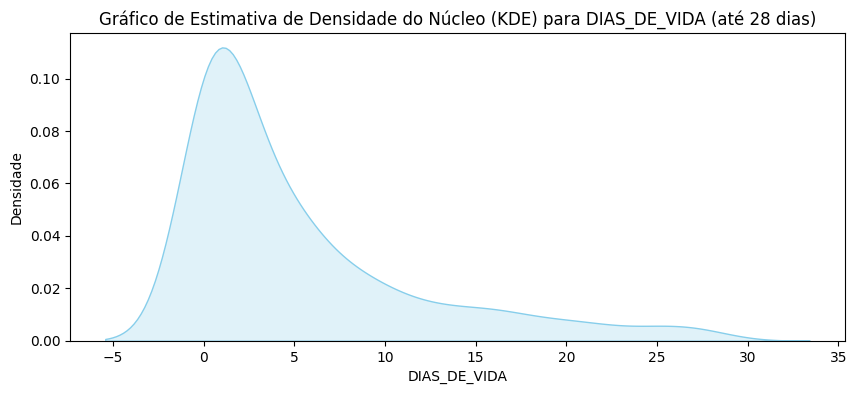

In [ ]:
# Filtrar o DataFrame para registros com DIAS_DE_VIDA menor ou igual a 28
df_filtrado = df[df['DIAS_DE_VIDA'] <= 28]

plt.figure(figsize=(10, 4))
sns.kdeplot(data=df_filtrado, x='DIAS_DE_VIDA', fill=True, color='skyblue')
plt.title('Gráfico de Estimativa de Densidade do Núcleo (KDE) para DIAS_DE_VIDA (até 28 dias)')
plt.xlabel('DIAS_DE_VIDA')
plt.ylabel('Densidade')
plt.show()


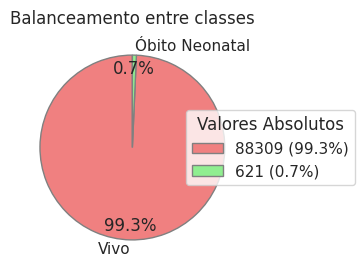

In [ ]:
plt.figure(figsize=(5, 3))
sns.set(style="whitegrid")

# Crie um gráfico de donuts com Seaborn
data = df['OBITO_NEONATAL'].value_counts()
ax = plt.pie(data, labels=['Vivo', 'Óbito Neonatal'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'],
             wedgeprops={'edgecolor': 'gray'}, startangle=90, pctdistance=0.85,)
plt.title('Balanceamento entre classes')

# Adicione valores absolutos como legendas
total_count = len(df)
abs_values = [f'{count} ({(count/total_count)*100:.1f}%)' for count in data]
plt.legend(abs_values, title='Valores Absolutos', loc='center left', bbox_to_anchor=(0.7, 0.5))

plt.show()
